# Model estimation

## Agriculture

### Load the data

In [1]:
from constants import Paths

In [2]:
PATHS = Paths()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import xgboost as xgb
import warnings
import numpy as np

# Suppress warnings
warnings.filterwarnings("ignore")

# Load your data
df = pd.read_parquet(PATHS.CleanMergedData)


# Add interaction terms
df['tpmax_q2_SMA_q2'] = df['tpmax_q2'] * df['SMA_q2']
df['tpmax_q2_SMA_q3'] = df['tpmax_q2'] * df['SMA_q3']
df['tpmax_q2_SMA_q4'] = df['tpmax_q2'] * df['SMA_q4']

df['tpmax_q3_SMA_q3'] = df['tpmax_q3'] * df['SMA_q3']
df['tpmax_q3_SMA_q4'] = df['tpmax_q3'] * df['SMA_q4']

df['tpmax_q2_drought_q2'] = df['tpmax_q2'] * df['drought_q2']
df['tpmax_q2_drought_q3'] = df['tpmax_q2'] * df['drought_q3']
df['tpmax_q2_drought_q4'] = df['tpmax_q2'] * df['drought_q4']

df['tpmax_q3_drought_q3'] = df['tpmax_q3'] * df['drought_q3']
df['tpmax_q3_drought_q4'] = df['tpmax_q3'] * df['drought_q4']

df['Intensity_q2_drought_q2'] = df['Intensity_q2'] * df['drought_q2']
df['Intensity_q2_drought_q3'] = df['Intensity_q2'] * df['drought_q3']
df['Intensity_q2_drought_q4'] = df['Intensity_q2'] * df['drought_q4']

df['Intensity_q3_drought_q3'] = df['Intensity_q3'] * df['drought_q3']
df['Intensity_q3_drought_q4'] = df['Intensity_q3'] * df['drought_q4']

df['tpmax_q2_lfinx_q2'] = df['tpmax_q2'] * df['lfinx_q2']
df['tpmax_q2_lfinx_q3'] = df['tpmax_q2'] * df['lfinx_q3']
df['tpmax_q2_lfinx_q4'] = df['tpmax_q2'] * df['lfinx_q4']

df['tpmax_q3_lfinx_q3'] = df['tpmax_q3'] * df['lfinx_q3']
df['tpmax_q3_lfinx_q4'] = df['tpmax_q3'] * df['lfinx_q4']

# Define feature columns and target column

feature_columns = [
     'number_monthly_critical_spi', 'spi03_m3', 'spi03_m6', 'spi06_m6', 'spi06_m12', 'spi12_m12',
    'number_monthly_critical_sma', 'SMA_q1', 'SMA_q2', 'SMA_q3', 'SMA_q4',
    'drought_q1', 'drought_q2', 'drought_q3', 'drought_q4',
    'tpmax_q2', 'tpmax_q3',
    'HWI_q2', 'HWI_q3', 'Intensity_q2', 'Intensity_q3', 'spell_duration_q2', 'spell_duration_q3',
    'spell_ind_q2', 'spell_ind_q3',
    'lfinx_q1', 'lfinx_q2', 'lfinx_q3', 'lfinx_q4',
    'critical_value_spi03_m3', 'critical_value_spi03_m6', 'critical_value_spi03_m9', 'critical_value_spi03_m12',
    'critical_value_fpanv_q1',  'critical_value_fpanv_q2',  'critical_value_fpanv_q3',  'critical_value_fpanv_q4',
    'fpanv_q1', 'fpanv_q2', 'fpanv_q3', 'fpanv_q4',
 
 'number_monthly_critical_spi_lagged1', 'spi03_m3_lagged1', 'spi03_m6_lagged1', 'spi06_m6_lagged1', 'spi06_m12_lagged1', 'spi12_m12_lagged1',
 'tpmax_q2_lagged1', 'tpmax_q3_lagged1',
 'gdp_lagged1', 'employment_TOTAL', 'employment_TOTAL_lagged1', 'population', 'area', 'employment_A_lagged1', 'gross_value_added_A_lagged1',
 'lat', 'lon', 'tercile_indicator',
    'tpmax_q2_SMA_q2', 'tpmax_q2_SMA_q3', 'tpmax_q2_SMA_q4',
    'tpmax_q3_SMA_q3', 'tpmax_q3_SMA_q4',
    'tpmax_q2_drought_q2', 'tpmax_q2_drought_q3', 'tpmax_q2_drought_q4',
    'tpmax_q3_drought_q3', 'tpmax_q3_drought_q4',
    'Intensity_q2_drought_q2', 'Intensity_q2_drought_q3', 'Intensity_q2_drought_q4',
    'Intensity_q3_drought_q3', 'Intensity_q3_drought_q4',
    'tpmax_q2_lfinx_q2', 'tpmax_q2_lfinx_q3', 'tpmax_q2_lfinx_q4',
    'tpmax_q3_lfinx_q3', 'tpmax_q3_lfinx_q4'
    
] 
#feature_columns = ['lfinx_q1', 'lfinx_q2', 'lfinx_q3', 'lfinx_q4','HWI_q2', 'HWI_q3','SMA_q1', 'SMA_q2', 'SMA_q3', 'SMA_q4' ]
target_column = 'gross_value_added_A'
target_columns = [target_column]

index_columns = ['year', 'nuts_id']


In [4]:
df = df[index_columns + feature_columns + target_columns]
df.shape

(22270, 82)

### Make scatterplots

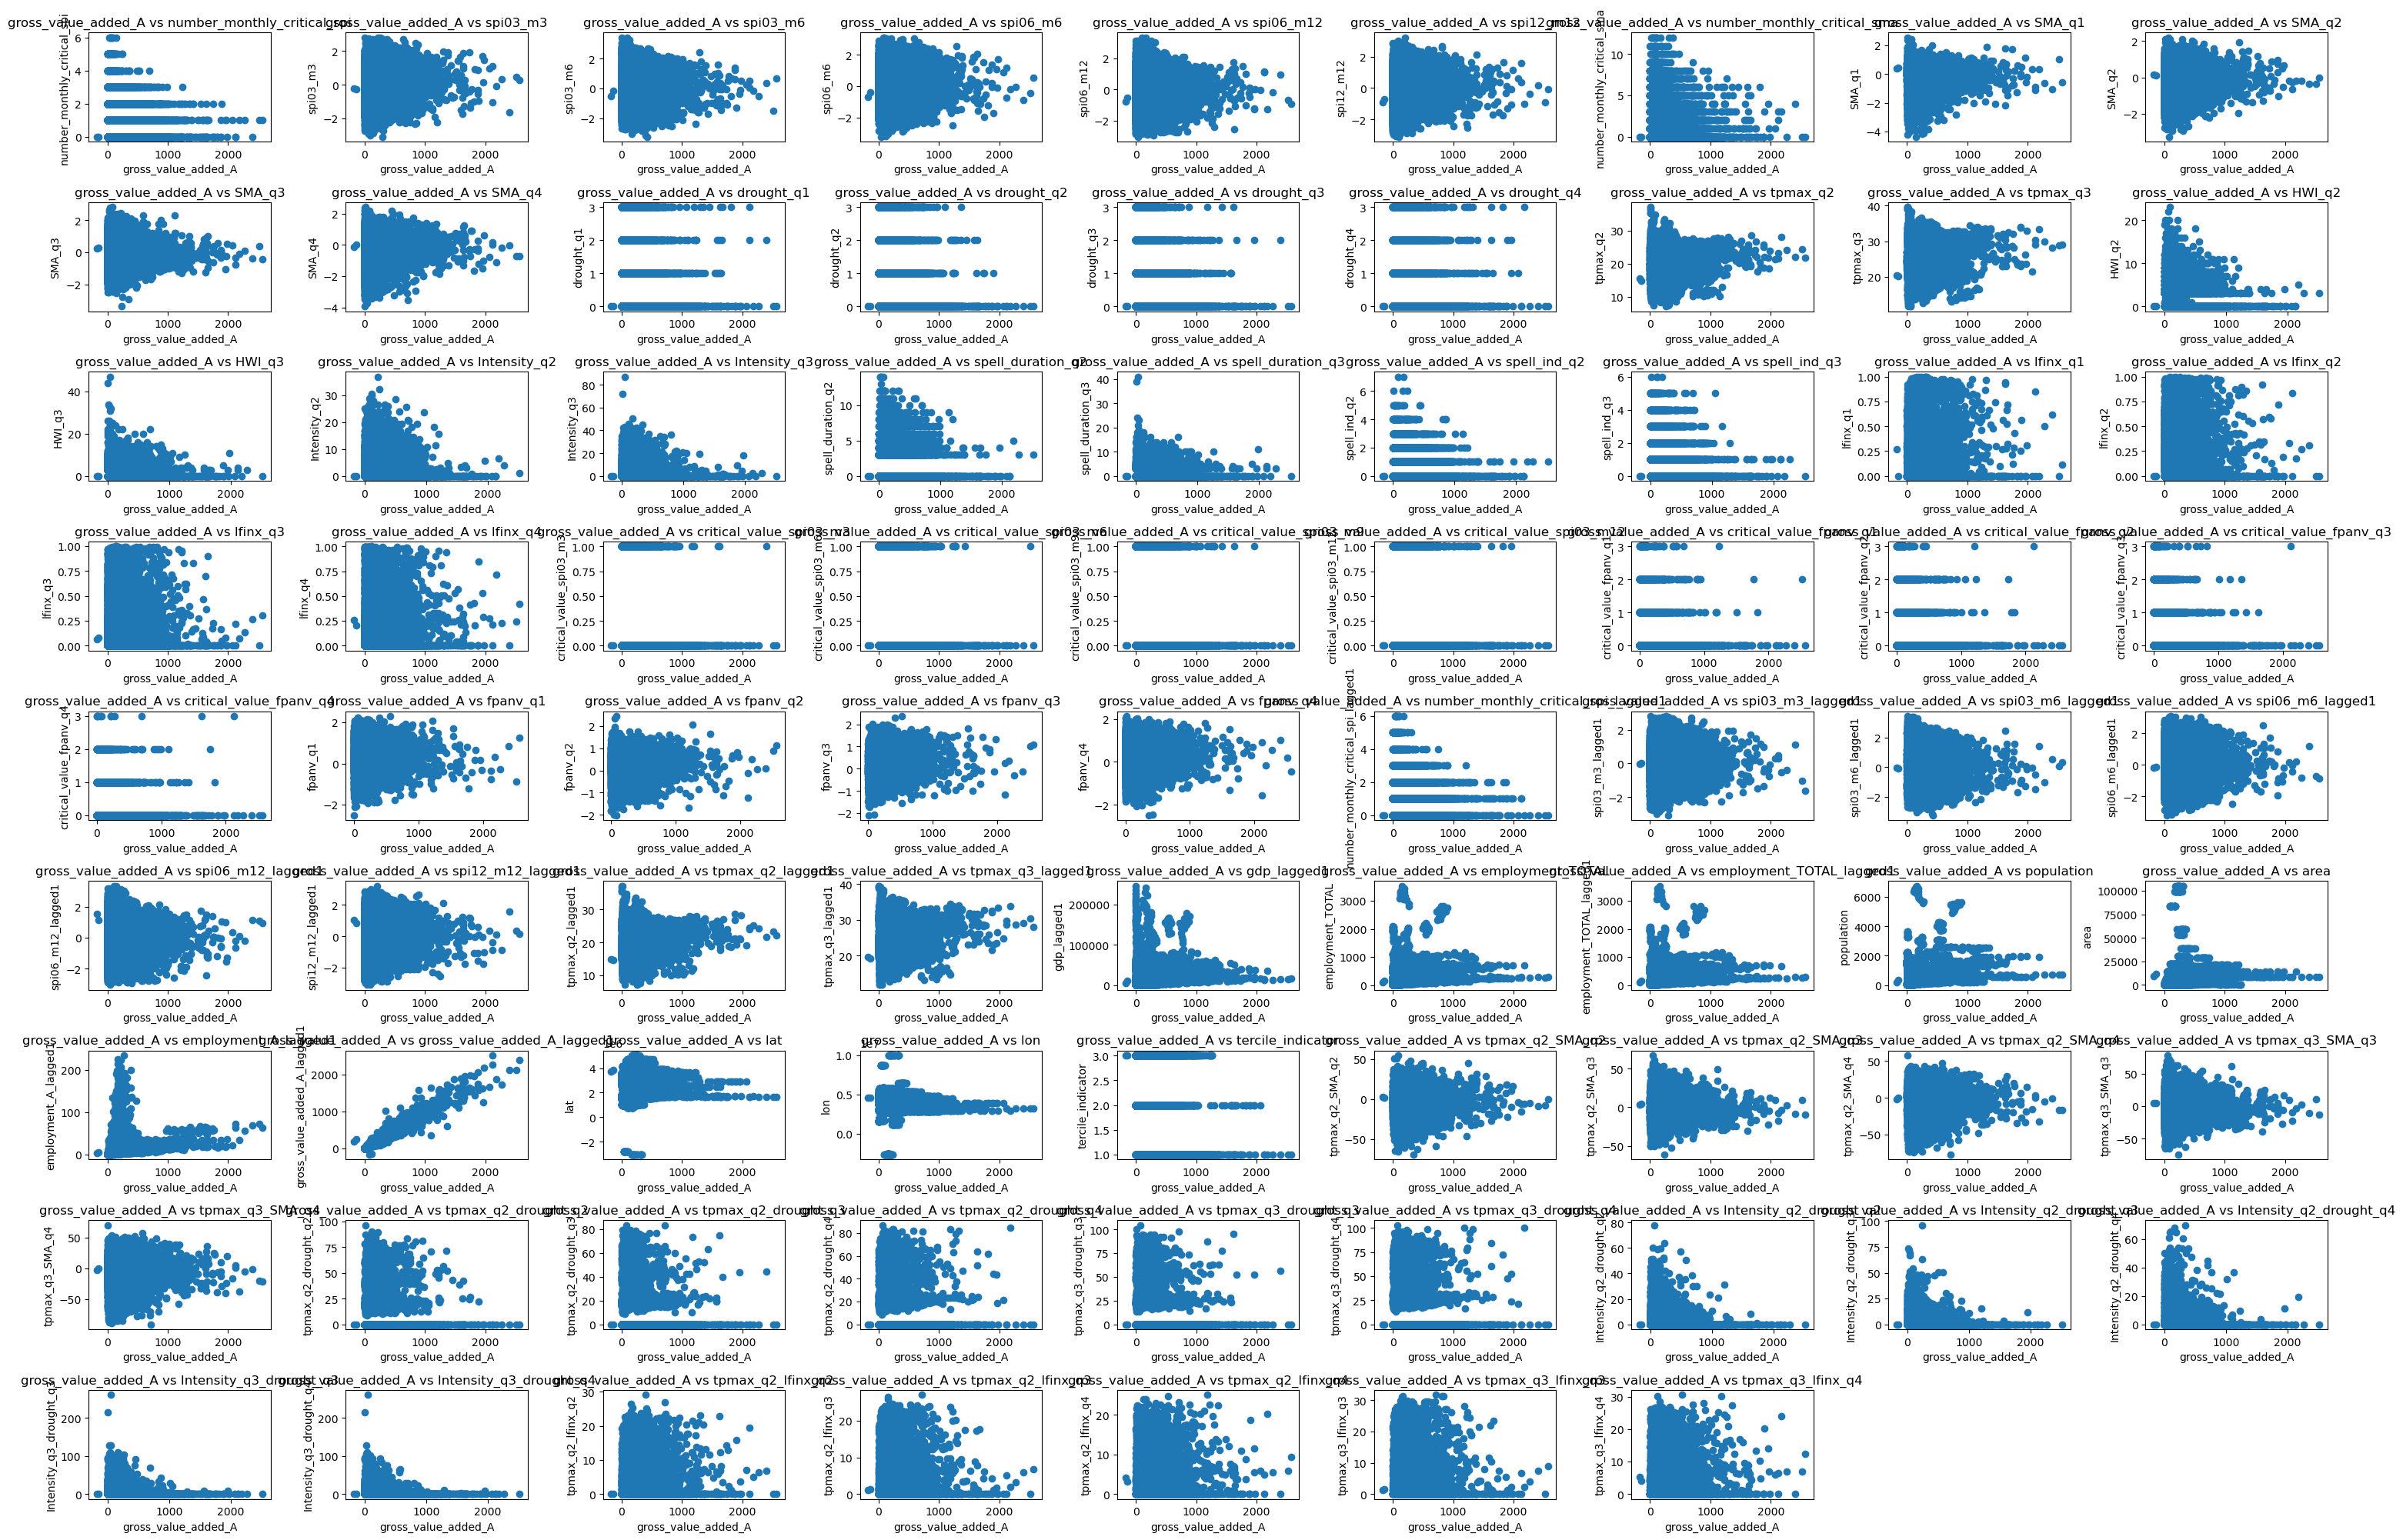

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Assuming 'df' is your DataFrame and it includes the columns mentioned in your code

# Select relevant columns
columns = feature_columns

# First variable
first_var = target_column

# Determine the layout of the subplots
num_plots = len(columns)
num_cols = math.ceil(math.sqrt(num_plots))
num_rows = math.ceil(num_plots / num_cols)

# Create a figure and array of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 20))  # Adjust the size as needed

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Create each subplot
for i, col in enumerate(columns):
    # Drop NaN values for the specific pair of variables
    temp_df = df[[first_var, col]].dropna()

    axs[i].scatter(temp_df[first_var], temp_df[col])
    axs[i].set_xlabel(first_var)
    axs[i].set_ylabel(col)
    axs[i].set_title(f'{first_var} vs {col}')

# Hide any unused subplots
for i in range(num_plots, len(axs)):
    axs[i].axis('off')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

### Estimate models

In [6]:
df_train = df[df['year']<= 2018]
df_test = df[df['year']> 2018]
X_train= df_train[feature_columns]
y_train = df_train[target_column] 
X_test= df_test[feature_columns]
y_test = df_test[target_column] 

In [7]:
# Create the XGBoost model
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate the model
xgb_predictions = xgb_model.predict(X_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    #'learning_rate': [0.3,0.5],
   # 'max_depth': [4,6],
    #'subsample': [0.8, 1]
}

# Create the GridSearchCV model
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error', 
                           verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve the best estimator
best_xgb_model = grid_search.best_estimator_

# Make predictions using the best model
best_xgb_predictions = best_xgb_model.predict(X_test)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [8]:
import lightgbm as lgb

# Create the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100)

# Train the model
lgb_model.fit(X_train, y_train)

# Evaluate the model
lgb_predictions = lgb_model.predict(X_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [100,200],
   # 'learning_rate': [0.3,0.5],
   # 'max_depth': [-1],
   # 'subsample': [0.8, 1]
}


# Create the GridSearchCV model
grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(),
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error', 
                           verbose=0)

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve the best estimator
best_lgb_model = grid_search.best_estimator_

# Make predictions using the best model
best_lgb_predictions = best_lgb_model.predict(X_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14717
[LightGBM] [Info] Number of data points in the train set: 19698, number of used features: 79
[LightGBM] [Info] Start training from score 162.779350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003559 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14717
[LightGBM] [Info] Number of data points in the train set: 13132, number of used features: 79
[LightGBM] [Info] Start training from score 209.921192
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003621 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14703
[LightGBM] [Info] Number of data points in the train set: 13132, number of used features: 79
[LightGBM] [Info] St

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
xgb_predictions = best_xgb_model.predict(X_test)
lgb_predictions = lgb_model.predict(X_test)

# Calculate RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_predictions))
rmse_lgb = np.sqrt(mean_squared_error(y_test, lgb_predictions))

# Calculate MAE
mae_xgb = mean_absolute_error(y_test, xgb_predictions)
mae_lgb = mean_absolute_error(y_test, lgb_predictions)

# Calculate R-squared
r2_xgb = r2_score(y_test, xgb_predictions)
r2_lgb = r2_score(y_test, lgb_predictions)

# Print results
print(f"XGBoost - RMSE: {rmse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}")
print(f"LightGBM - RMSE: {rmse_lgb}, MAE: {mae_lgb}, R²: {r2_lgb}")


XGBoost - RMSE: 46.44863307683041, MAE: 22.307878218969652, R²: 0.9597873922232866
LightGBM - RMSE: 46.62917224546593, MAE: 19.93918442910121, R²: 0.9594741834380954


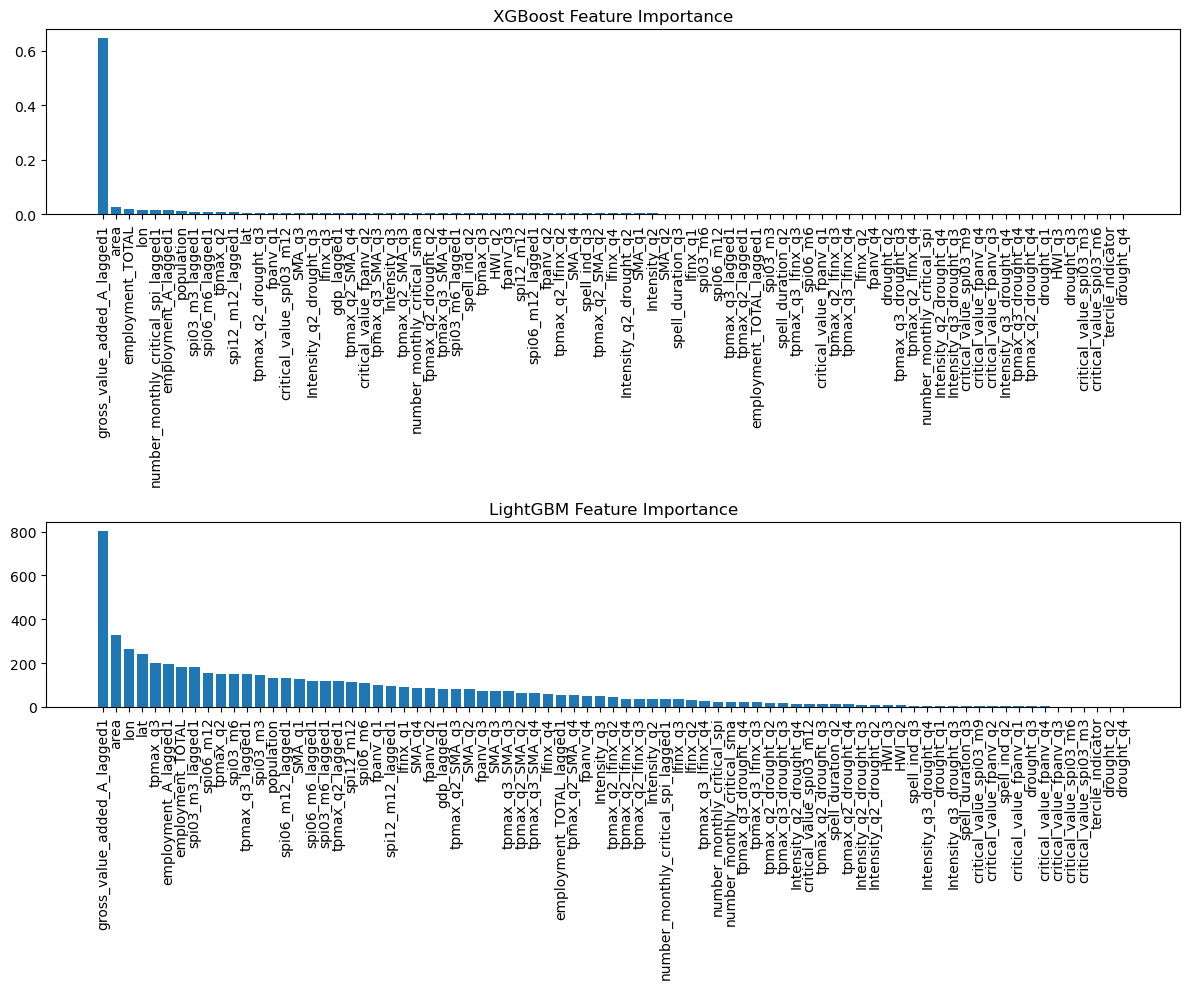

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming feature_columns is already defined and contains the feature names used in your models
# Extract feature importances
xgb_feature_importance = best_xgb_model.feature_importances_
lgb_feature_importance = best_lgb_model.feature_importances_

# Create DataFrames
df_xgb = pd.DataFrame({'Feature': feature_columns, 'Importance': xgb_feature_importance})
df_lgb = pd.DataFrame({'Feature': feature_columns, 'Importance': lgb_feature_importance})

# Sort DataFrames
df_xgb = df_xgb.sort_values(by='Importance', ascending=False)
df_lgb = df_lgb.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.bar(df_xgb['Feature'], df_xgb['Importance'])
plt.title('XGBoost Feature Importance')
plt.xticks(rotation='vertical')

plt.subplot(2, 1, 2)
plt.bar(df_lgb['Feature'], df_lgb['Importance'])
plt.title('LightGBM Feature Importance')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()



In [11]:
lgb_predictions.shape

(2572,)

In [12]:
df_test.shape

(2572, 82)

In [13]:
df_test.head()

year nuts_id  number_monthly_critical_spi  spi03_m3  spi03_m6  spi06_m6  \
17  2019   AT111                            0   -0.8015     0.532     -0.02   
18  2020   AT111                            2    -0.849   -0.3705    -0.749   
36  2019   AT112                            0    -0.595    0.7195    0.2445   
37  2020   AT112                            1   -0.6595    0.1675    -0.246   
55  2019   AT113                            0    -0.762     0.259    -0.235   

    spi06_m12  spi12_m12  number_monthly_critical_sma    SMA_q1  ...  \
17      0.034       -0.1                            1    -0.135  ...   
18     0.6995     -0.041                            1      0.15  ...   
36    -0.5155    -0.3285                            1    -0.149  ...   
37     0.6255      0.231                            2 -0.265667  ...   
55      0.803      0.369                            4 -1.675333  ...   

    Intensity_q2_drought_q3  Intensity_q2_drought_q4  Intensity_q3_drought_q3  \
17                     <NA>                     <NA>                     <NA>   
18                     <NA>                     <NA>                     <NA>   
36                     <NA>                     <NA>                     <NA>   
37                     <NA>                     <NA>                     <NA>   
55                     <NA>                     <NA>                     <NA>   

    Intensity_q3_drought_q4  tpmax_q2_lfinx_q2  tpmax_q2_lfinx_q3  \
17                     <NA>               <NA>               <NA>   
18                     <NA>               <NA>               <NA>   
36                     <NA>                0.0            5.77205   
37                     <NA>          13.326476                0.0   
55                     <NA>                0.0                0.0   

    tpmax_q2_lfinx_q4  tpmax_q3_lfinx_q3  tpmax_q3_lfinx_q4  \
17               <NA>               <NA>               <NA>   
18               <NA>               <NA>               <NA>   
36           8.814736           7.293909          11.138829   
37                0.0                0.0                0.0   
55                0.0                0.0                0.0   

    gross_value_added_A  
17                 37.0  
18                 44.0  
36                153.0  
37                171.0  
55                 72.0  

[5 rows x 82 columns]

In [14]:
predictions_df = pd.DataFrame(lgb_predictions, columns=['gross_value_added_A_pred'])

# Make sure that the predictions DataFrame has the same index as df_test
predictions_df.index = df_test.index

# Concatenate the selected columns from df_test with the predictions DataFrame
predictions_df = pd.concat([df_test[['year', 'nuts_id', 'gross_value_added_A']], predictions_df], axis=1)


In [15]:
predictions_df

year nuts_id  gross_value_added_A  gross_value_added_A_pred
17     2019   AT111                 37.0                 39.328643
18     2020   AT111                 44.0                 37.112578
36     2019   AT112                153.0                178.640270
37     2020   AT112                171.0                148.129200
55     2019   AT113                 72.0                 69.412842
...     ...     ...                  ...                       ...
22248  2020   SK041               186.11                188.610620
22249  2021   SK041               204.57                200.483222
22267  2019   SK042               195.54                233.036588
22268  2020   SK042               183.78                196.431879
22269  2021   SK042               208.22                201.382838

[2572 rows x 4 columns]

## Manufacturing

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import xgboost as xgb
import warnings
import numpy as np

# Suppress warnings
warnings.filterwarnings("ignore")

# Load your data
df = pd.read_parquet(PATHS.CleanMergedData)


# Add interaction terms
df['tpmax_q2_SMA_q2'] = df['tpmax_q2'] * df['SMA_q2']
df['tpmax_q2_SMA_q3'] = df['tpmax_q2'] * df['SMA_q3']
df['tpmax_q2_SMA_q4'] = df['tpmax_q2'] * df['SMA_q4']

df['tpmax_q3_SMA_q3'] = df['tpmax_q3'] * df['SMA_q3']
df['tpmax_q3_SMA_q4'] = df['tpmax_q3'] * df['SMA_q4']

df['tpmax_q2_drought_q2'] = df['tpmax_q2'] * df['drought_q2']
df['tpmax_q2_drought_q3'] = df['tpmax_q2'] * df['drought_q3']
df['tpmax_q2_drought_q4'] = df['tpmax_q2'] * df['drought_q4']

df['tpmax_q3_drought_q3'] = df['tpmax_q3'] * df['drought_q3']
df['tpmax_q3_drought_q4'] = df['tpmax_q3'] * df['drought_q4']

df['Intensity_q2_drought_q2'] = df['Intensity_q2'] * df['drought_q2']
df['Intensity_q2_drought_q3'] = df['Intensity_q2'] * df['drought_q3']
df['Intensity_q2_drought_q4'] = df['Intensity_q2'] * df['drought_q4']

df['Intensity_q3_drought_q3'] = df['Intensity_q3'] * df['drought_q3']
df['Intensity_q3_drought_q4'] = df['Intensity_q3'] * df['drought_q4']

df['tpmax_q2_lfinx_q2'] = df['tpmax_q2'] * df['lfinx_q2']
df['tpmax_q2_lfinx_q3'] = df['tpmax_q2'] * df['lfinx_q3']
df['tpmax_q2_lfinx_q4'] = df['tpmax_q2'] * df['lfinx_q4']

df['tpmax_q3_lfinx_q3'] = df['tpmax_q3'] * df['lfinx_q3']
df['tpmax_q3_lfinx_q4'] = df['tpmax_q3'] * df['lfinx_q4']

# Define feature columns and target column

feature_columns = [
     'number_monthly_critical_spi', 'spi03_m3', 'spi03_m6', 'spi06_m6', 'spi06_m12', 'spi12_m12',
    'number_monthly_critical_sma', 'SMA_q1', 'SMA_q2', 'SMA_q3', 'SMA_q4',
    'drought_q1', 'drought_q2', 'drought_q3', 'drought_q4',
    'tpmax_q2', 'tpmax_q3',
    'HWI_q2', 'HWI_q3', 'Intensity_q2', 'Intensity_q3', 'spell_duration_q2', 'spell_duration_q3',
    'spell_ind_q2', 'spell_ind_q3',
    'lfinx_q1', 'lfinx_q2', 'lfinx_q3', 'lfinx_q4',
    'critical_value_spi03_m3', 'critical_value_spi03_m6', 'critical_value_spi03_m9', 'critical_value_spi03_m12',
    'critical_value_fpanv_q1',  'critical_value_fpanv_q2',  'critical_value_fpanv_q3',  'critical_value_fpanv_q4',
    'fpanv_q1', 'fpanv_q2', 'fpanv_q3', 'fpanv_q4',
 
 'number_monthly_critical_spi_lagged1', 'spi03_m3_lagged1', 'spi03_m6_lagged1', 'spi06_m6_lagged1', 'spi06_m12_lagged1', 'spi12_m12_lagged1',
 'tpmax_q2_lagged1', 'tpmax_q3_lagged1',
 'gdp_lagged1', 'employment_TOTAL', 'employment_TOTAL_lagged1', 'population', 'area', 'employment_C_lagged1', 'gross_value_added_C_lagged1',
 'lat', 'lon', 'tercile_indicator',
    'tpmax_q2_SMA_q2', 'tpmax_q2_SMA_q3', 'tpmax_q2_SMA_q4',
    'tpmax_q3_SMA_q3', 'tpmax_q3_SMA_q4',
    'tpmax_q2_drought_q2', 'tpmax_q2_drought_q3', 'tpmax_q2_drought_q4',
    'tpmax_q3_drought_q3', 'tpmax_q3_drought_q4',
    'Intensity_q2_drought_q2', 'Intensity_q2_drought_q3', 'Intensity_q2_drought_q4',
    'Intensity_q3_drought_q3', 'Intensity_q3_drought_q4',
    'tpmax_q2_lfinx_q2', 'tpmax_q2_lfinx_q3', 'tpmax_q2_lfinx_q4',
    'tpmax_q3_lfinx_q3', 'tpmax_q3_lfinx_q4'
    
] 
#feature_columns = ['lfinx_q1', 'lfinx_q2', 'lfinx_q3', 'lfinx_q4','HWI_q2', 'HWI_q3','SMA_q1', 'SMA_q2', 'SMA_q3', 'SMA_q4' ]
target_column = 'gross_value_added_C'
target_columns = [target_column]

index_columns = ['year', 'nuts_id']


In [17]:
df_train = df[df['year']<= 2018]
df_test = df[df['year']> 2018]
X_train= df_train[feature_columns]
y_train = df_train[target_column] 
X_test= df_test[feature_columns]
y_test = df_test[target_column] 

In [18]:
# Create the XGBoost model
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

# Train the model
xgb_model.fit(X_train, y_train)

# Evaluate the model
xgb_predictions = xgb_model.predict(X_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
   # 'learning_rate': [0.3,0.5],
   # 'max_depth': [4,6],
   # 'subsample': [0.8, 1],
   # 'colsampe_bytree':[0.8,1]
}

# Create the GridSearchCV model
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror'),
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error', 
                           verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve the best estimator
best_xgb_model = grid_search.best_estimator_

# Make predictions using the best model
best_xgb_predictions = best_xgb_model.predict(X_test)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [19]:
import lightgbm as lgb

# Create the LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100)

# Train the model
lgb_model.fit(X_train, y_train)

# Evaluate the model
lgb_predictions = lgb_model.predict(X_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [100,200],
   # 'learning_rate': [0.3,0.5],
   # 'max_depth': [-1],
   # 'subsample': [0.8, 1]
}

# Create the GridSearchCV model
grid_search = GridSearchCV(estimator=lgb.LGBMRegressor(),
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error', 
                           verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve the best estimator
best_lgb_model = grid_search.best_estimator_

# Make predictions using the best model
best_lgb_predictions = best_lgb_model.predict(X_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14717
[LightGBM] [Info] Number of data points in the train set: 19698, number of used features: 79
[LightGBM] [Info] Start training from score 1436.134983
Fitting 3 folds for each of 2 candidates, totalling 6 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14717
[LightGBM] [Info] Number of data points in the train set: 13132, number of used features: 79
[LightGBM] [Info] Start training from score 1456.237187
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14703
[LightGBM] [Info] Number of data points in the train

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
xgb_predictions = best_xgb_model.predict(X_test)
lgb_predictions = lgb_model.predict(X_test)

# Calculate RMSE
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_predictions))
rmse_lgb = np.sqrt(mean_squared_error(y_test, lgb_predictions))

# Calculate MAE
mae_xgb = mean_absolute_error(y_test, xgb_predictions)
mae_lgb = mean_absolute_error(y_test, lgb_predictions)

# Calculate R-squared
r2_xgb = r2_score(y_test, xgb_predictions)
r2_lgb = r2_score(y_test, lgb_predictions)

# Print results
print(f"XGBoost - RMSE: {rmse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}")
print(f"LightGBM - RMSE: {rmse_lgb}, MAE: {mae_lgb}, R²: {r2_lgb}")

XGBoost - RMSE: 1118.616276115182, MAE: 191.93493140549165, R²: 0.8423675918241851
LightGBM - RMSE: 1453.3670689354365, MAE: 211.96447722401268, R²: 0.7339067406389452


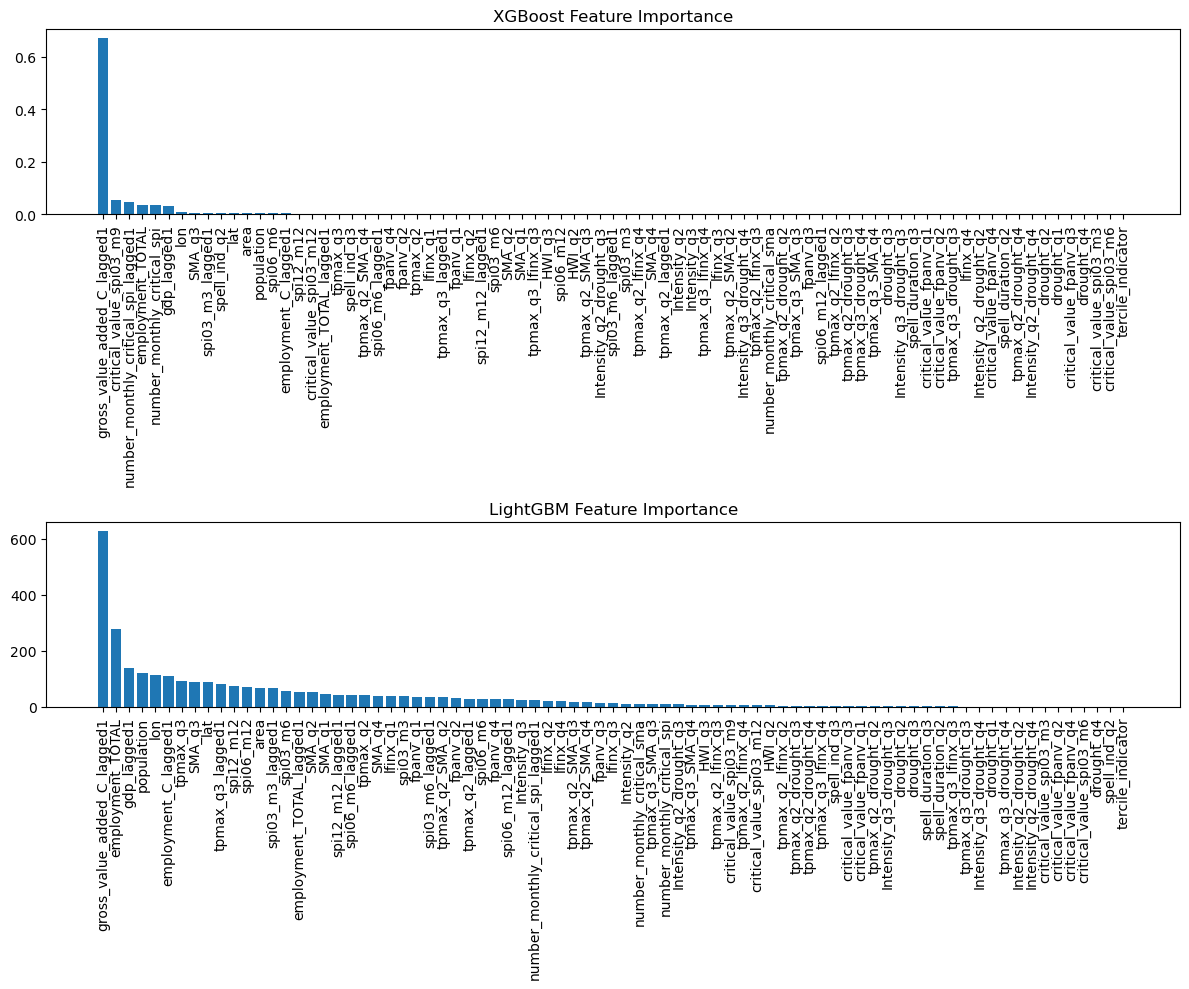

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming feature_columns is already defined and contains the feature names used in your models
# Extract feature importances
xgb_feature_importance = best_xgb_model.feature_importances_
lgb_feature_importance = best_lgb_model.feature_importances_

# Create DataFrames
df_xgb = pd.DataFrame({'Feature': feature_columns, 'Importance': xgb_feature_importance})
df_lgb = pd.DataFrame({'Feature': feature_columns, 'Importance': lgb_feature_importance})

# Sort DataFrames
df_xgb = df_xgb.sort_values(by='Importance', ascending=False)
df_lgb = df_lgb.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.bar(df_xgb['Feature'], df_xgb['Importance'])
plt.title('XGBoost Feature Importance')
plt.xticks(rotation='vertical')

plt.subplot(2, 1, 2)
plt.bar(df_lgb['Feature'], df_lgb['Importance'])
plt.title('LightGBM Feature Importance')
plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [22]:
predictions_df_C = pd.DataFrame(xgb_predictions, columns=['gross_value_added_C_pred'])

# Make sure that the predictions DataFrame has the same index as df_test
predictions_df_C.index = df_test.index

# Concatenate the selected columns from df_test with the predictions DataFrame
predictions_df_C = pd.concat([df_test[['year', 'nuts_id', 'gross_value_added_C']], predictions_df_C], axis=1)
predictions_df_C

year nuts_id  gross_value_added_C  gross_value_added_C_pred
17     2019   AT111                152.0                147.754913
18     2020   AT111                146.0                133.307587
36     2019   AT112                623.0                635.788208
37     2020   AT112                574.0                592.846191
55     2019   AT113                412.0                395.339478
...     ...     ...                  ...                       ...
22248  2020   SK041              1736.57               1812.986450
22249  2021   SK041              2012.74               1844.910400
22267  2019   SK042              2546.43               2164.073975
22268  2020   SK042              2337.87               2477.595215
22269  2021   SK042              2835.63               2321.093262

[2572 rows x 4 columns]

In [23]:
predictions_final = pd.merge(predictions_df, predictions_df_C, on = ['year', 'nuts_id'])
predictions_final

year nuts_id  gross_value_added_A  gross_value_added_A_pred  \
0     2019   AT111                 37.0                 39.328643   
1     2020   AT111                 44.0                 37.112578   
2     2019   AT112                153.0                178.640270   
3     2020   AT112                171.0                148.129200   
4     2019   AT113                 72.0                 69.412842   
...    ...     ...                  ...                       ...   
2567  2020   SK041               186.11                188.610620   
2568  2021   SK041               204.57                200.483222   
2569  2019   SK042               195.54                233.036588   
2570  2020   SK042               183.78                196.431879   
2571  2021   SK042               208.22                201.382838   

      gross_value_added_C  gross_value_added_C_pred  
0                   152.0                147.754913  
1                   146.0                133.307587  
2                   623.0                635.788208  
3                   574.0                592.846191  
4                   412.0                395.339478  
...                   ...                       ...  
2567              1736.57               1812.986450  
2568              2012.74               1844.910400  
2569              2546.43               2164.073975  
2570              2337.87               2477.595215  
2571              2835.63               2321.093262  

[2572 rows x 6 columns]

In [24]:
# geo, year, gva_Agr, gva_Man

predictions_submission = predictions_final[['nuts_id', 'year','gross_value_added_A_pred', 'gross_value_added_C_pred']]

In [25]:
predictions_submission = predictions_submission.rename(columns = {'nuts_id': 'geo', 'gross_value_added_A_pred': 'gva_Agr', 'gross_value_added_C_pred': 'gva_Man'})

In [26]:
predictions_submission.to_csv(PATHS.OutputData, index = False, sep=',')